
## Chap08_수치 시뮬레이션으로 소비자의 행동 예측

**8장 내용**

* 미래 예측을 위한 선택지를 넓혀가는 수법 → **수치 시뮬레이션**

* 소비자 행동이 입소문과 같은 전파로 어떻게 변화하는지를 인간관계 네트워크구조를 이용한 수치 시뮬레이션 방법을 이용

* 수치 시뮬레이션으로 미래를 예측하는 과정 파악 

**고객의 소리**

물류 비용 개선에서 다양한 것을 알 수 있었고, 계속해서 분석을 부탁드립니다. 이번에는 우리 회사 제품의 판매를 예측할 수 있는지를 검토해줬으면 합니다. 우리 제품은 대대적인 홍보를 하지는 않지만, 거의 SNS를 통해 입소문을 타고 퍼지고 있습니다. 재구매 고객은 우리와 SNS로 연결돼 있어 파악이 가능합니다. 이것을 이용해 앞으로의 매출을 예측할 수 있을까요? 

**전제조건**

- 재구매 고객 20명의 SNS 연결 상태 : links.csv
    * 연결이 있으면 1
    * 연결이 없으면 0
    
- 모든 재구매 고객 540명의 SNS 연결 상태 : links_members.csv

- 모든 재구매 고객 540명의 2년간 매월 이용 현황 : info_members.csv
    * 이용 실적이 있는 달 1
    * 이용 실적이 없는 달 0 

### **테크닉 71 인간관계 네트워크를 가시화**

소비자의 입소문에 의한 행동 분석을 위해 SNS로 연결된 20명의 연결 데이터 분석 

In [43]:
import pandas as pd 
df_links = pd.read_csv('links.csv')
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
NUM = len(df_links.index)
print(NUM)

20


In [45]:
dfidx = df_links.index
print(dfidx)

RangeIndex(start=0, stop=20, step=1)


In [46]:
for i in range(1, 21) :
    for j in range(1, 21) :
        print(i, j)

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
1

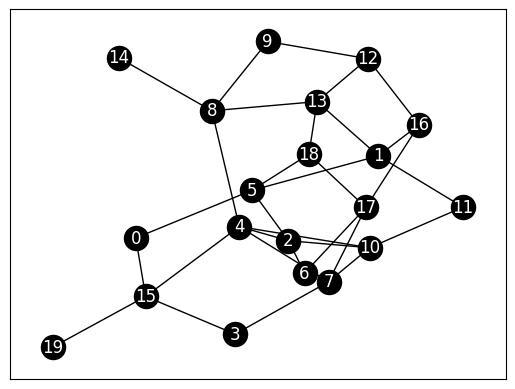

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 객체 생성 
G = nx.Graph()

# 노드 설정 
NUM = len(df_links.index)

for i in range(1, NUM+1) :
    node_no = df_links.columns[i].strip("Node") # 열이름에서 Node 제거 
    #print(node_no)
    G.add_node(str(node_no))
    
# 엣지 설정 
for i in range(NUM) :
    for j in range(NUM) :
        #print(i, j)
        node_name = "Node" + str(j)
        
        if df_links[node_name].iloc[i] == 1:
            G.add_edge(str(i), str(j))
            
# 그리기 
nx.draw_networkx(G, node_color = "k", edge_color = "k", font_color = "w")
plt.show()

* draw_networkx : 다른 것과 연결이 많은 노드를 중심에 오게 자동으로 위치를 결정해서 가시화 

### **테크닉 72 : 입소문에 의한 정보 전파 모습을 가시화**

* 가정 : 10개의 연결 중 하나의 확률(10%의 확률)로 소문이 전파된다.

In [48]:
import numpy as np

In [49]:
def determine_link(percent) :
    rand_val = np.random.rand()
    if rand_val <= percent : 
        return 1
    else : 
        return 0 

In [50]:
def simulate_percolation(num, list_active, percent_percolation) :
    for i in range(num) :
        if list_active[i] == 1:
            for j in range(num) :
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i] == 1:
                    if determine_link(percent_percolation) == 1:
                        list_active[j] = 1
    return list_active

In [51]:

percent_percolation = 0.1
T_NUM = 36
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

* **determine_link 함수**
    - 입소문의 전파 여부를 확률적으로 결정
    - 인수로 입소문을 낼 확률을 전달한다.<br><br>
    
* **simulate_percolation 함수**
    - 입소문을 시뮬레이션
    - 첫 번째 인수 num은 사람 수
    - 두 번째 인수 list_active는 각각의 노드(사람)에 입소문이 전달됐는지를 1 또는 0으로 표현한 배열
    - 세 번째 인수 percent_percolation는 입소문을 일으킬 확률
    - percent_percolation = 0.1(입소문을 일으킬 확률 10%)로 하고, 36스텝을 반복
    - 한 달에 입소문을 일으킬 확률을 10%로, 이것을 36개월 반복하는 것 

In [52]:
def active_node_coloring(list_active) :
    #print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])) :
        
        if list_timeSeries[t][i] == 1:
            list_color.append("r")
            
        else : 
            list_color.append("k")
            
    #print(len(list_color))
    return list_color

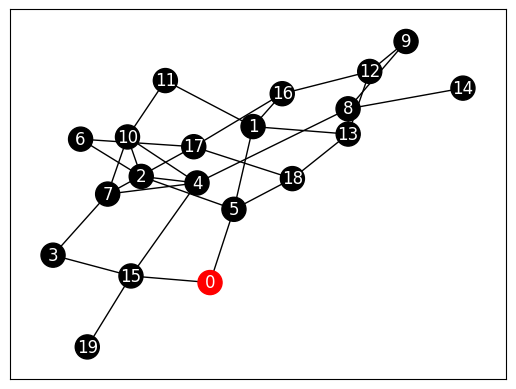

In [53]:
t = 0 
nx.draw_networkx(G, font_color = "w", node_color = active_node_coloring(list_timeSeries[t]))
plt.show()

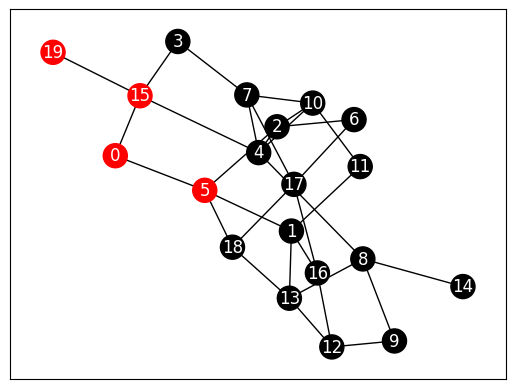

In [54]:
t = 11 
nx.draw_networkx(G, font_color = "w", node_color = active_node_coloring(list_timeSeries[t]))
plt.show()

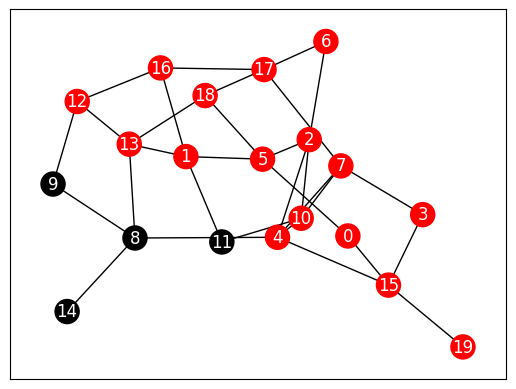

In [55]:
t = 35
nx.draw_networkx(G, font_color = "w", node_color = active_node_coloring(list_timeSeries[t]))
plt.show()

* activa_node_coloring은 입소문이 전파된(활성화된) 노드는 빨간색으로, 아직 전파되지 않은(활성화되지 않은) 노드는 검은색으로 색칠하는 함수
    - 이것으로 t = 0, 11, 35(1개월 후, 12개월 후, 36개월 후)를 표시한다. 
    - 12개월 정도까지는 완만한 전파였기만, 오랜 시간이 결과하면 거의 전원에게 전파되는 모습인 것을 알 수 있다.
    

### **테크닉 73 : 입소문 수의 시계열 변화를 그래프화해 보자**

테크닉 72의 방법으로 1개월째부터 36개월째까지 모두 가시화하면 언제 어떻게 입소문 전파가 이루어졌는지 알 수 있다. 입소문이 난 수를 시계열로 표현하는 것만으로도 입소문이 퍼지는 전체 모양을 어느 정도 파악할 수 있다. 여기서 입소문의 수를 시계열로 표시한다.

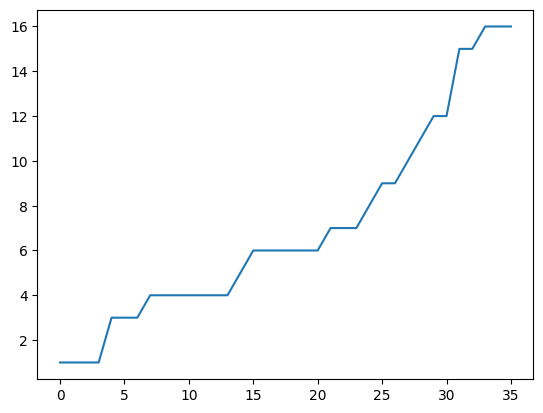

In [56]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)) :
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

각 시각에서 입소문이 전파한(활성화된) 수를 표시하면 이렇게 단계적으로 입소문이 나는 모습을 확인할 수 있다.
확률적으로 계산하기 때문에 각자 계산 결과가 조금 다를 수 있지만, 서서히 전파되어 전원에게 전파되는 모습이 확인되면 문제 없다.

### **테크닉 74 : 회원 수의 시계열 변화를 시뮬레이션해 보자**

입소문을 통해 스포츠 센터의 이용 상황이 어떻게 변화해가는지를 시뮬레이션 해본다.
분석과 시뮬레이션을 함께 하면 미래를 예측할 수 있다.
또 입소문에 의한 스포츠 센터 회원의 소비자 행동 분석 과정은 소비자 행동을 분석하는 과제라면 어디에나 사용할 수 있는 일반적인 방법이다.

In [62]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links) :
    # 확산 # 
    for i in range(num) :
        if list_active[i] == 1 :
            for j in range(num) :
                if df_links.iloc[i][j] == 1:
                    if determine_link(percent_percolation) == 1:
                        list_active[j] = 1
                        
    # 소멸 # 
    for i in range(num) :
        if determine_link(percent_disapparence) == 1:
            list_active[i] = 0 
    return list_active

In [63]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100 
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM) :
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

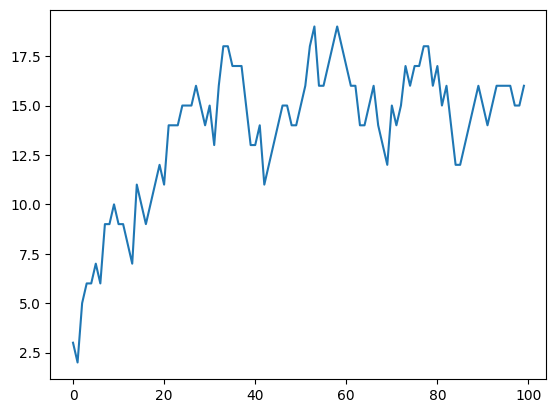

In [64]:
# 시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)) :
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

* simulate_population 함수는 입소문 전파(확산)뿐만 아니라 새롭게 '소멸'이라는 조작도 추가한다.  
    - 스포츠 센터의 회원은 지금까지 센터를 이용하던 사람이 어느 날 갑자기 이용하지 않는(탈퇴 회원) 경우도 있다. 
    - 여기서는 그럴 확률이 5%로 일어난다고 가정하고, 입소문에 의한 회원 증가와 감소의 모습을 시뮬레이션 한다<br><br>

* 그림과 같이 증감을 반복하면서 서서히 100%의 이용률을 향해가는 모습을 확인할 수 있다.  
    - 커뮤니티의 입소문의 힘으로 조금씩 스포츠 센터를 지속해서 이용하는 힘이 강해지는 것으로 보아 현실에 맞는 시뮬레이션 결과라는 것을 알 수 있다.<br><br>
    
* 소멸의 확률을 조금 늘려보면 이용자가 줄어드는 모습을 확인할 수 있다.

In [79]:
percent_disapparence = 0.2
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM) :
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

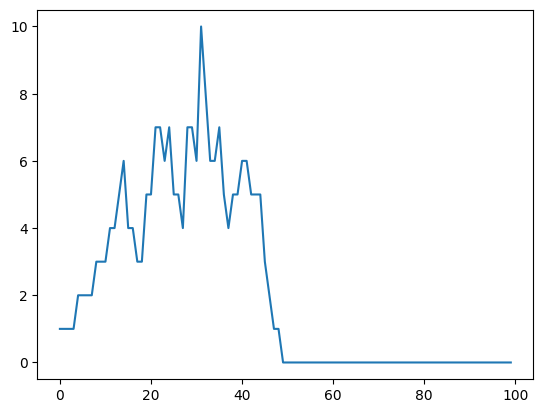

In [80]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)) :
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

소멸될 확률을 20%로 하면 이렇게 43개월 후에는 이용자가 없어지는 모습을 확인할 수 있다.

### **테크닉 75 : 파라미터 전체를 '상관관계'를 보면서 파악하기**

이렇게 입소문 전파(확산)와 이용 중단(소멸)이 어떤 확률로 일어나는지는 상품이나 서비스의 성질에 따라 달라지고, 캠페인 유무에 따라 영향을 크게 받는다. 그리고 이 확률이 상품의 보급에 어떻게 영향을 주는지(길게 보면 정착을 하고 있는지 아니면 잊혀지는지)가 한층 중요하다. 이런 보급의 모습을 파악하기 위해서는 '상관관계'를 그리면 알기 쉽다. 

In [91]:
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram, NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram) :
    for i_d in range(NUM_PhaseDiagram) :
        percent_percolation = 0.05 * i_p 
        percent_disapparence = 0.05 * i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM) :
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)
print(phaseDiagram)            
    

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 11. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0. 15. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 15. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 13. 15.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 15. 16. 10.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 15. 16. 11. 13.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 17. 14.  0. 13. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 17. 13. 15. 12. 15. 11.  8.  5.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 17. 15. 14. 12. 12. 13. 12.  9.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 18. 17. 14. 12.  0. 12.  0.  7.  0.  0.  0.  0.  0.  0.

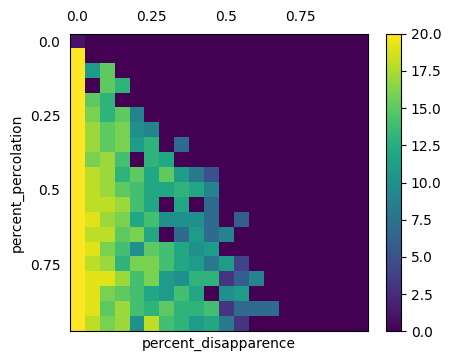

In [92]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink = 0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom = False, left = False, right = False, top = False)
plt.show()

이 결과는 입소문이 일어날 확률과 소멸이 일어날 확률을 조금씩 변화시키면서 100개월 후에 몇 명이 계속 이용하는지를 색으로 표현한 것
* 소멸의 확률이 낮으면 입소문의 확률이 어느 정도 낮아도 탈퇴 없이 20명 전원이 이용하고 있는 것을 볼 수 있다.
* 소멸의 확률이 20 ~ 30% 넘으면 입소문 확률이 높더라도 이용자는 증가시키지 않는 모습을 볼 수 있다.  
파라미터의 관계와 성질을 이해하는 데 있어 상관관계 그림이 도움이 된다.

### **테크닉 76 : 실제 데이터 불러오기**

스포츠 센터의 회원 전체 데이터 이용해서 시뮬레이션하기  
540명 회원 데이터가 있는 links_member.csv와 info_members.csv 불러오기  
links_member.cs에는 540명의 각각의 SNS 연결이 저장돼 있고, info_members.csv 에는 540명의 24개월간 이용 현황을 이용 현황을 이용한 달을 1로, 이용하지 않은 달을 0으로 표시한 것이 저장돼 있다.

In [93]:
df_mem_links = pd.read_csv('links_members.csv')
df_mem_info = pd.read_csv('info_members.csv')

In [94]:
df_mem_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Node535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
536,Node536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
537,Node537,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
538,Node538,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### **테크닉 77 : 링크 수의 분포를 가시화해 보자**

네트워크를 가시화하는 것이 가장 좋지만, 540명이라는 규모는 네트워크를 가시화해도 노드가 밀집해서 네트워크의 상황을 파악하기가 어렵다.  
네트워크의 구조에는 몇 안 되는 스텝으로 전원이 연결되는 '스몰 월드형'과 소수의 연결을 많이 가지는 사람이 허브가 되는 '스케일 프리형' 등 여러 가지가 있다. 어떤 구조를 가지고 있는지는 링크 수의 분포를 가시화해 보면 어느 정도 파악할 수 있다.

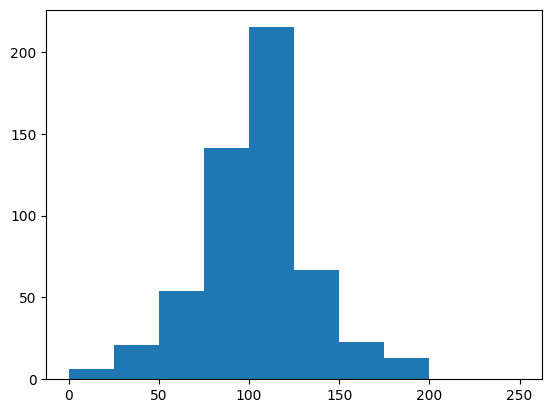

In [99]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM) :
    array_linkNum[i] = sum(df_mem_links["Node" + str(i)])
    
plt.hist(array_linkNum, range=(0, 250), bins=10)
plt.show()

Matplotlib의 hist 함수로 링크 개수의 히스토그램을 표시할 수 있다.  
그래프를 보면 링크 개수가 대량 100 정도에 집중된 정규분포에 가까운 모습인 것을 알 수 있다.  
스케일 프리형이라면 이 분포가 '멱 법칙(power-law Distribution)'에 가까워지며, 링크를 많이 가진 허브가 작동하지 않으면(입소문을 퍼뜨리지 않으면) 입소문이 중간에 퍼지지 않는 특징을 가지고 있다.  
그러나 이 분포는 거의 모든 노드가 어느 정도의 링크 수를 가지고 있는 분포이기 때문에 '급격히 입소문이 퍼지지 않는' 대신에 '허브에 의존하지 않고 입소문이 퍼지기 쉽다.' 라고 말할 수 있다.

### **테크닉78 : 시뮬레이션을 위해 실제 데이터로부터 파라미터를 추정하기**

데이터의 네트워크 구조를 분석했으니 이 데이터를 사용해 시뮬레이션하는 것을 생각해보자.  
정확도 높은 시뮬레이션을 할 수 있다면 그것을 그대로 미래 예측에 사용할 수 있다.  
시뮬레이션하기 위해서는 먼저 데이터를 이용해서 파라미터를 추정해야 한다.  
이번 모델에서 가장 중요한 파라미터는 입소문이 전파될 확률인 percent_percolation과 그것이 소멸될 확률인 percent_disapparence이다.

In [101]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns) - 1
# 소명 확률 추청 # 
count_active = 0 
count_active_to_inactive = 0 
for t in range(1, T_NUM) :
    for i in range(NUM) :
        if (df_mem_info.iloc[i][t] == 1) :
            count_active_to_inactive += 1 
            if (df_mem_info.iloc[i][t + 1]== 0) :
                count_active += 1
estimated_percent_disapparence = count_active / count_active_to_inactive

In [102]:
# 확산 확률 추정 # 
count_link = 0 
count_link_to_active = 0 
count_link_temp = 0 
for t in range(T_NUM - 1) :
    df_link_t = df_mem_info[df_mem_info[str(t)] == 1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)) :
        df_link_temp = df_mem_links[df_mem_links["Node" + str(df_link_t.index[i])] == 1]
        for j in range(len(df_link_temp.index)) :
            if (df_mem_info.iloc[df_link_temp.index[j]][str(t)] == 0) :
                if (temp_flag_count[df_link_temp.index[j]] == 0) :
                    count_link += 1
                if (df_mem_info.iloc[df_link_temp.index[j]][str(t+1)] == 1):
                    if (temp_flag_count[df_link_temp.index[j]] == 0) :
                        temp_flag_count[df_link_temp.index[j]] = 1
                        count_link_to_active += 1
                        
estimated_percent_percolation = count_link_to_active / count_link

In [103]:
estimated_percent_disapparence

0.10147163541419416

In [104]:
estimated_percent_percolation

0.039006364196263604

추정한 확률 중 소멸 확률인 estimated_percent_disapparence는 그다지 어렵지 않다고 생각된다.  
df_mem_info를 시계열순으로 보고, 1스텝 전과 비교해서 활성(1)이 비활성(0)으로 변화한 비율을 세어보면 어느 정도 정확하게 추정할 수 있다. 
어려운 것은 입소문이 전파되는(확산될) 확률 estimated_percent_percolation이다.  
어떤 노드가 비활성(0)의 상태에서 활성(1)의 상태로 변했다고 가정. 이것이 어떤 확률에 근거해서 발생했다고 생각하지만, 이 노드의 링크 개수와 관계없이 변화는 발생하기 때문에 단순히 비활성이나 활성의 개수를 세고 그 비율로부터 확률을 추정하는 방법은 정확하지 않다. 따라서 이것을 바탕으로 중복해서 세지 않게 한 것이 위 코드이다.  
이렇게 추정한 파라미터로 어느 정도 정확한 시뮬레이션이 될 것인지 확인해본다.


### **테크닉79 : 실제 데이터와 시뮬레이션을 비교**

테크닉 78에서 추정한 percent_percolation과 percent_disapparence(입소문이 전파하고 확산할 확률과 소멸할 확률)를 이용해서 테크닉 74에서 진행한 시뮬레이션을 실행한다. 

In [105]:
percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM) :
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
    list_timeSeries.append(list_active.copy())

In [106]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)) :
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [107]:
T_NUM = len(df_mem_info.columns) -1
list_timeSeries_num_real = []
for t in range(0, T_NUM) :
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)] == 1].index))

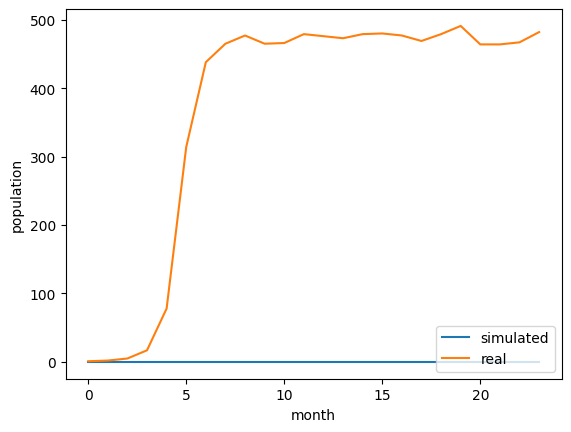

In [108]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc = 'lower right')
plt.show()